<a href="https://colab.research.google.com/github/sharminnahar-002/m-machine/blob/main/or_threshold_error_correction_learning_delta_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
def Threshold(z):
  return 1 if z >= 0 else 0

In [ ]:
eta = 0.1
epoch = 10
input = np.array([[0, 0, 1, 1], [0, 1, 0, 1], [1, 1, 1, 1]])
target = np.array([[0, 1, 1, 1]])
w = np.random.rand(1, input.shape[0])
# w = np.array([[0.3, -0.1, -0.1]])

In [ ]:
error_list = []
for j in range(epoch):
  print(f"Epoch {j+1}:")
  for i, row in enumerate(input.transpose()):
    v = np.dot(row, w[0,:])
    y = Threshold(v)
    # y = int(np.round(sigmoid(v)))
    error = target[0][i] - y
    error_list.append(error**2)
    del_w1 = eta * error * row[0]
    del_w2 = eta * error * row[1]
    del_w3 = eta * error * row[2]

    w[0][0] = np.round(w[0][0] + del_w1, 2)
    w[0][1] = np.round(w[0][1] + del_w2, 2)
    w[0][2] = np.round(w[0][2] + del_w3, 2)

    print(f"Input: {row[0:2]} | Output: {target[0][i]} | Predicted: {y} | Error (d-y): {error} | del_w1: {del_w1} | del_w2: {del_w2} | del_w0: {del_w3} | w1: {w[0][0]} | w2: {w[0][1]} | w0: {w[0][2]}")
    print("------------------------------------------------------------------------------------------------------------------------------")

# print(w)
dx = []
dy = []
for i in range(-2, 3):
  dx.append(i)
  dy.append(((-w[0][0]/w[0][1]) * i) + (-w[0][2] / w[0][1]))

Epoch 1:
Input: [0 0] | Output: 0 | Predicted: 1 | Error (d-y): -1 | del_w1: -0.0 | del_w2: -0.0 | del_w0: -0.1 | w1: 0.42 | w2: 0.7 | w0: -0.03
------------------------------------------------------------------------------------------------------------------------------
Input: [0 1] | Output: 1 | Predicted: 1 | Error (d-y): 0 | del_w1: 0.0 | del_w2: 0.0 | del_w0: 0.0 | w1: 0.42 | w2: 0.7 | w0: -0.03
------------------------------------------------------------------------------------------------------------------------------
Input: [1 0] | Output: 1 | Predicted: 1 | Error (d-y): 0 | del_w1: 0.0 | del_w2: 0.0 | del_w0: 0.0 | w1: 0.42 | w2: 0.7 | w0: -0.03
------------------------------------------------------------------------------------------------------------------------------
Input: [1 1] | Output: 1 | Predicted: 1 | Error (d-y): 0 | del_w1: 0.0 | del_w2: 0.0 | del_w0: 0.0 | w1: 0.42 | w2: 0.7 | w0: -0.03
------------------------------------------------------------------------------

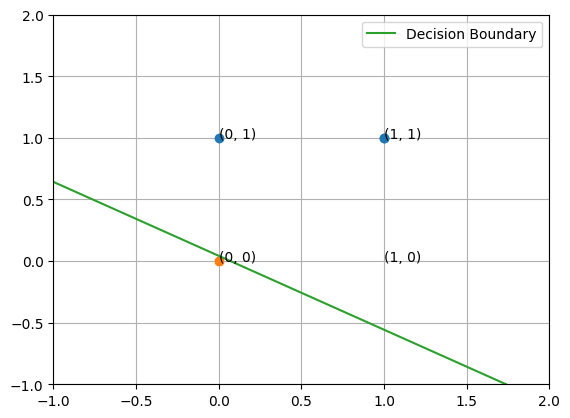

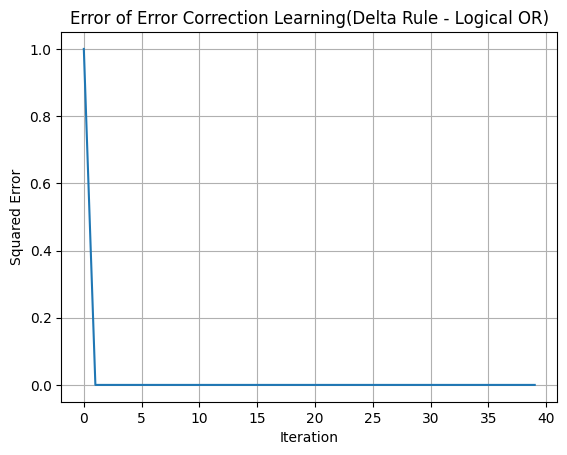

In [ ]:
plt.plot([0, 1, 1], [1, 1, 1], 'o')
plt.plot(0,0, '8')
plt.plot(dx, dy, label="Decision Boundary")
plt.axis([-1, 2, -1, 2])
for i_x, i_y in zip([0, 0, 1, 1], [0, 1, 0, 1]):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.grid()
plt.legend()
plt.show()

plt.plot([i for i in range(epoch*4)], error_list)
plt.xlabel('Iteration')
plt.ylabel('Squared Error')
plt.title('Error of Error Correction Learning(Delta Rule - Logical OR)')
plt.grid()
plt.show()
